In [1]:
#IMPORT LIBRARIES AND DATASET
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn import metrics
%matplotlib inline
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_476fc84dba1840ab9642a53a67a9fee1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='aoKsr7hrbtI2xdpKWpRcWbkgQMmXg9d1BXTfgPEd_lyF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_476fc84dba1840ab9642a53a67a9fee1.get_object(Bucket='practice-donotdelete-pr-oeeiomev3cv5hz',Key='market-price.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
df.head()


,DATE,PRICE
0,2019-08-01,10084.70
1,2019-08-02,10407.17
2,2019-08-03,10529.55
3,2019-08-04,10814.57
4,2019-08-05,10980.23


In [3]:
#DROP DATE VARIABLE
df=df.drop(['DATE'],axis=1)
df.head()

,PRICE
0,10084.70
1,10407.17
2,10529.55
3,10814.57
4,10980.23


In [4]:
#A variable for predicting 'n' days out into the future
prediction_days = 30

#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['PRICE']].shift(-prediction_days)
df.head()

,PRICE,Prediction
0,10084.70,9577.99
1,10407.17,9600.90
2,10529.55,9769.79
3,10814.57,10386.64
4,10980.23,10621.29


In [5]:
#CHECK THE NULL VALUES IN DATASET
df.isnull().sum(axis=0)

PRICE          0
Prediction    30
dtype: int64

In [6]:
#REPLACE THE NULL VALUES WITH MEAN 
df=df.fillna(df.mean())
df.tail()

,PRICE,Prediction
361,9938.83,8553.366488
362,11042.40,8553.366488
363,10934.94,8553.366488
364,11102.67,8553.366488
365,11114.93,8553.366488


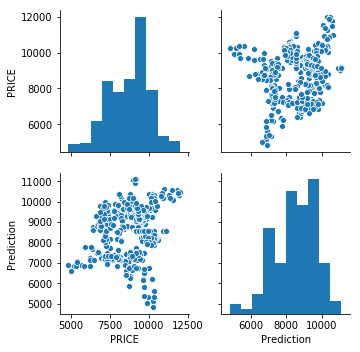

In [16]:
#VISUALIZE THE RELATIONSHIP BETWEEN VARIABLES
sns.pairplot(df)

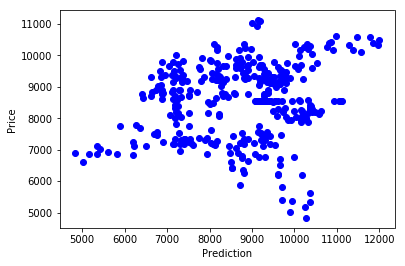

In [13]:
#SCATTER PLOT BETWEEN PRICE AND PREDICTION
x = df[['PRICE']].values
y = df[['Prediction']].values
plt.scatter(df.PRICE,df.Prediction,  color='blue')
plt.xlabel("Prediction")
plt.ylabel("Price")
plt.show()

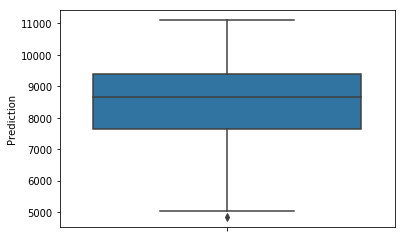

In [14]:
#BOX PLOT OF PRICE AND PREDICTION FOR MORE CLARITY 
sns.boxplot(y=df["Prediction"]);
plt.show()

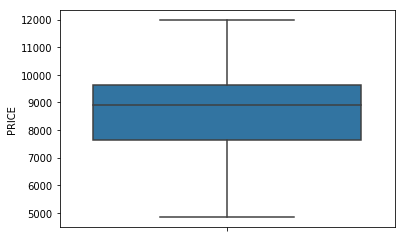

In [19]:
sns.boxplot(y=df["PRICE"]);
plt.show()

In [7]:
#DECLARE X & Y TO BUILD MODEL
x=df[['PRICE']].values
y=df['Prediction'].values

In [8]:
#SPLIT THE DATA INTO TRAINING AND TESTING 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [9]:
#BUILD THE MODEL
clf = svm.SVR(kernel = 'rbf')
clf.fit(x_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
#PREDICT PREDICTION VARIABLE
y_pred = clf.predict(x_test)

In [11]:
#LOOK THE ACTUAL AND PREDICTED VALUE IN A DATAFRAME
y_pred = clf.predict(x_test)
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data_10=data.head(10)
data_10

,Actual,Predicted
0,7067.740000,8643.866161
1,9303.590000,8643.866157
2,8353.540000,8643.892901
3,8432.230000,8644.359968
4,8482.700000,8643.866157
5,8553.366488,8643.866157
6,7431.000000,8643.866157
7,9348.910000,8644.212302
8,7549.520000,8643.866157
9,10577.800000,8643.866157


Text(0.5, 1.0, 'Representation of Actual vs Predicted value')

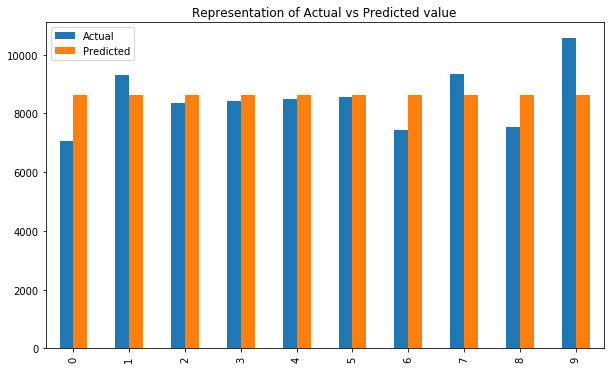

In [12]:
#BAR PLOT OF ACTUAL AND PREDICTED VALUE
data_10.plot(kind='bar',figsize=(10,6))
plt.title('Representation of Actual vs Predicted value')

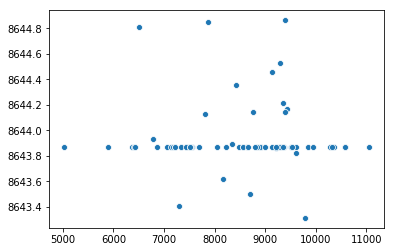

In [17]:
#SCATTER PLOT OF TESTING AND PREDICTING DATA
sns.scatterplot(x=y_test,y=y_pred)
plt.show()